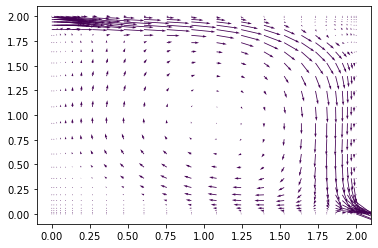

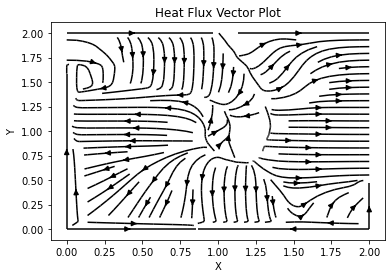

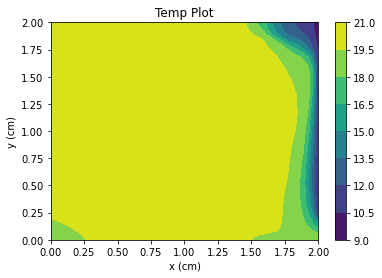

In [61]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
import math 
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp2d
#-----------Loding File-------------------
f1=open("xc.dat",'r')
f2=open("yc.dat")
f3=open("u.dat")
f4=open("v.dat")
#--------Read File X and Y............................
xc=f1.readlines()
xc = list(map(float, xc))
xc=np.array(xc)
nim1=len(xc)                      #26
ni=nim1+1                         #27                                           

yc=f2.readlines()
yc = list(map(float, yc))
yc=np.array(yc)
njm1=len(yc)                      #26
nj=njm1+1                         #27
#-----------Read File U and V in cell center----------------
u1=f3.readlines()
u1 = list(map(float, u1))
u2d=np.reshape(u1,(ni,nj)) #27*27
u2d=np.array(u2d)
u2d=u2d.transpose()

v1=f4.readlines()
v1 = list(map(float, v1))
v2d=np.reshape(v1,(ni,nj)) #27*27
v2d=np.array(v2d)
v2d=v2d.transpose()
#-------Calculate Xp and Yp node Value--------------------------
xp= np.ones(ni)
for i in range(1,nim1):
    xp[i]=0.5*(xc[i]+xc[i-1])
xp[0]=xc[0]
xp[-1]=xc[-1]

yp= np.ones(nj)
for i in range(1,njm1):
    yp[i]=0.5*(yc[i]+yc[i-1])
yp[0]=yc[0]
yp[-1]=yc[-1]
#................Plot velocity at the cell center(node).....................
# plt.quiver(xp,yp,u2d,v2d,9)
# plt.savefig("output1.png",dpi=600)
# plt.show()
#----------------------velocity at the faces-------------------
Nx=ni-2    #number of cell
Ny=nj-2
u=np.zeros((nim1,njm1),dtype=np.float64)
v=np.zeros((nim1,njm1),dtype=np.float64)
for i in range(1,ni-1):
    for j in range(1,nj-1):
        u[i][j]=0.5*(u2d[i][j-1]+u2d[i][j])
        #u[i][j]=u2d[i][j-1]+(u2d[i,j]-u2d[i,j-1])*(xc[i]-xp[i])/(xp[i]-xp[i-1]);
for i in range(0,nim1):
    u[i][0]=u2d[i+1][0]
    u[i][-1]=u2d[i+1][-1]
for i in range(1,ni-1):
    for j in range(1,nj-1):
        v[i][j]=0.5*(v2d[i-1][j]+v2d[i][j])
        #v[i][j]=v2d[i-1][j]+(v2d[i][j]-v2d[i-1][j])*(yc[j]-yp[j])/(yp[j+1]-yp[j]);
for i in range(0,nim1):
    v[i][0]=v2d[i+1][0]
    v[i][-1]=v2d[i+1][-1]
#................Plot velocity at the face center(node).....................    
plt.quiver(xc,yc,u,v,9)
#plt.savefig("output2.png",dpi=600)  
plt.show()
#----------------parameter define------------------------------------ 
gamma=1/500 #k_by_cp
rho=1
Key=0
epc=0.001
residu=[]
itaration=[]
count=0
T_0=np.ones((ni,nj),dtype=np.float64)
T=np.ones((ni,nj),dtype=np.float64)
#..................defineboundary condition----------
for i in range(0,ni):
        if(yc[i-1]>=1.8):#1.864
            T[i][0]=20
        if(yc[i-1]>=0.136):
            T[i][-1]=10
#------------------equation loop-----------------------------------   
Fw=np.ones((nim1,njm1),dtype=np.float64);Fe=np.ones((nim1,njm1),dtype=np.float64);Fs=np.ones((nim1,njm1),dtype=np.float64)
Fn=np.ones((nim1,njm1),dtype=np.float64);Dw=np.ones((nim1,njm1),dtype=np.float64);Ds=np.ones((nim1,njm1),dtype=np.float64)
Dn=np.ones((nim1,njm1),dtype=np.float64);De=np.ones((nim1,njm1),dtype=np.float64);Aw=np.ones((nim1,njm1),dtype=np.float64)
As=np.ones((nim1,njm1),dtype=np.float64);Ap=np.ones((nim1,njm1),dtype=np.float64);An=np.ones((nim1,njm1),dtype=np.float64)
As=np.ones((nim1,njm1),dtype=np.float64);Ae=np.ones((nim1,njm1),dtype=np.float64)
while(Key==0):    
    for i in range(1,ni-1):
        for j in range(1,nj-1):
            Fw[i,j]=rho*u[i][j-1]*(yc[i]-yc[i-1]);  Dw[i,j]=(gamma*(yc[i]-yc[i-1]))/(xp[j]-xp[j-1])
            Fe[i,j]=rho*u[i][j]*(yc[i]-yc[i-1]);    De[i,j]=(gamma*(yc[i]-yc[i-1]))/(xp[j+1]-xp[j])
            Fs[i,j]=rho*v[i-1][j]*(xc[j]-xc[j-1]);  Ds[i,j]=(gamma*(xc[j]-xc[j-1]))/(yp[i]-yp[i-1])
            Fn[i,j]=rho*v[i][j]*(xc[j]-xc[j-1]);    Dn[i,j]=(gamma*(xc[j]-xc[j-1]))/(yp[i+1]-yp[i])
            Aw[i,j]=max(Fw[i,j],(Dw[i,j]+Fw[i,j]/2),0); As[i,j]=max(Fs[i,j],(Ds[i,j]+Fs[i,j]/2),0)
            Ae[i,j]=max(-Fe[i,j],(De[i,j]-Fe[i,j]/2),0);An[i,j]=max(-Fn[i,j],(Dn[i,j]-Fn[i,j]/2),0)
            Ap[i,j]=Aw[i,j]+Ae[i,j]+An[i,j]+As[i,j]
            T[i][j]=(Ae[i,j]*T[i][j+1]+Aw[i,j]*T[i][j-1]+An[i,j]*T[i+1][j]+As[i,j]*T[i-1][j])/Ap[i,j]
    #Boundaries Update for Newmann................................................
    for i in range(0,ni):
        if(yc[i-1]<=0.136):
            T[i,-1]=T[i,-2]
        if(yc[i-1]<=1.864):
            T[i,0]=T[i,1]
    for j in range(0,ni):
        T[0,j] = T[1,j]
        T[-1,j] = T[-2,j]

    count=count+1
    itaration.append(count)
    #error calculation
    err=0
    for i in range(1,ni-1):
        for j in range(1,nj-1):
            err =err + abs(Ae[i,j]*T[i,j+1]+Aw[i,j]*T[i,j-1]+An[i,j]*T[i+1,j]+As[i,j]*T[i-1,j]-Ap[i,j]*T[i,j])
            
    f = rho*1*2*0.068*10
    err = err/f
    if(err<epc):
        Key=1
    T_0=copy.copy(T)
#....................calculation of Heat flux ..................................
qx=np.zeros((nim1,njm1),dtype=np.float64)#25*26
qy=np.zeros((nim1,njm1),dtype=np.float64)#26*25
for i in range(0,njm1):
    for j in range(0,nim1):
        qx[i][j-1]  =-gamma*(T[i][j]-T[i][j-1])*(yc[i]-yc[i-1])/(xp[j]-xp[j-1]) 
        qx[i][j]=-gamma*(T[i][j+1]-T[i][j])*(yc[i]-yc[i-1])/(xp[j+1]-xp[j])
        qy[i][j]=-gamma*(T[i+1][j]-T[i][j])*(xc[j]-xc[j-1])/(yp[i+1]-yp[i])
        qy[i-1][j]  =-gamma*(T[i][j]-T[i-1][j])*(xc[j]-xc[j-1])/(yp[i]-yp[i-1])

        
qR=np.sqrt(np.square(qx)+np.square(qy)) 
xi = np.linspace(xc.min(), xc.max(), xc.size)
yi = np.linspace(yc.min(), yc.max(), yc.size)
[n1,n2]=np.meshgrid(xi,yi)
#fig = plt.figure(figsize =(8, 8))
plt.streamplot(n1,n2,qx,qy, density=1,linewidth=None, color='k')
#fig.colorbar(strm.lines)
plt.title('Heat Flux Vector Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("Heat Flux Vector Plotfor_0_001.png",dpi=600)
plt.show()


#..............plot section...........................

[X,Y]=np.meshgrid(xp,yp)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, T)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Temp Plot')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
plt.savefig("output2.png",dpi=600)
plt.show()

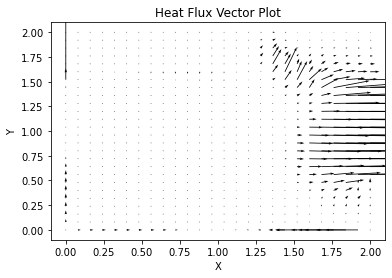

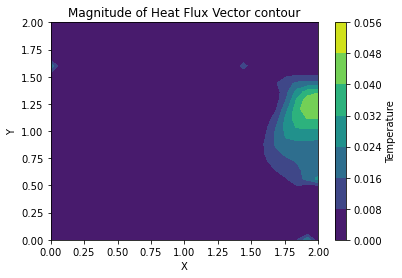

In [62]:
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
from scipy.linalg import norm
import math 
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp2d
qR=np.sqrt(np.square(qx)+np.square(qy)) 
xi = np.linspace(xc.min(), xc.max(), xc.size)
yi = np.linspace(yc.min(), yc.max(), yc.size)
[n1,n2]=np.meshgrid(xi,yi)
#fig = plt.figure(figsize =(8, 8))
plt.quiver(n1,n2,qx,qy)
#fig.colorbar(strm.lines)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heat Flux Vector Plot')
plt.savefig("Heat Flux Vector Plot_1.png",dpi=600)
plt.show()
fig,ax=plt.subplots(1,1)
cp = ax.contourf(n1, n2, qR)
fig.colorbar(cp,label='Temperature')
plt.title('Magnitude of Heat Flux Vector contour')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig("Magnitude of Heat Flux Vector contour.png",dpi=600)
plt.show()

In [65]:
sum(qy[0])-sum(qy[-1])+sum(qx[:, 0])-sum(qx[:, -1])

-0.3719792623296825